In [6]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [12]:
def readData():
    train = pd.read_csv("甘藍-初秋.csv")
    return train

def dropData(train):
    train=train.drop(["Unnamed: 0"], axis=1)
    train=train.drop(["crop_name"], axis=1)
    train=train.drop(["crop_num"], axis=1)
    train=train.drop(["market_name"], axis=1)
    train=train.drop(["market_num"], axis=1)
    return train

def sta(train):
    train= train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train

def buildTrain(train, pastDay=1, futureDay=1):
    X_train, Y_train ,Z_train= [], [],[]
    for i in range(train.shape[0]-futureDay-pastDay+1):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["high"]))
        Z_train.append(np.array(train.iloc[i+pastDay-1:i+pastDay+futureDay-1]["high"]))
    return np.array(X_train), np.array(Y_train), np.array(Z_train)
def shuffle(X,Y,Z):
    np.random.seed()
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList],Z[randomList]
def splitData(X,Y,Z,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    Z_val = Z[:int(Z.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val,Z_val

def buildModel(train_x,train_y):
    model = Sequential()
    model.add(LSTM(200, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(Dropout(0.6))
    model.add(LSTM(150))
    model.add(Dropout(0.6))
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=300, batch_size=32, validation_split=0.1, callbacks=[callback])
    return model
def predict(model,val_x,val_y,val_z):
    a=range(0,val_y.shape[0])
    val_y=val_y.reshape(-1)
    val_z=val_z.reshape(-1)
    plt.plot(a,val_y)
    b=[]
    co=0
    coo=0
    for i in range(0,val_x.shape[0]):
        temp=val_x[i]
        temp=temp.reshape(1,1,9)
        z=model.predict(temp, verbose=0)
        if val_y[i]>=val_z[i] and z>=val_z[i]:
            co=co+1
        if val_y[i]<val_z[i] and z<val_z[i]:
            co=co+1
        sub=val_y[i]-val_z[i]
        sub_a=0.5*sub+val_z[i]
        sub_b=1.5*sub+val_z[i]
        sub2=val_z[i]-val_y[i]
        sub2_a=val_z[i]-0.5*sub2
        sub2_b=val_z[i]-1.5*sub2
        if val_y[i]>=val_z[i] and z>=val_z[i]:
            if z>=sub_a and z<=sub_b:
                coo=coo+1
        if val_y[i]<val_z[i] and z<val_z[i]:
            if z<=sub2_a and z>=sub2_b:
                coo=coo+1
        b.append(z)
    b=np.array(b)
    b=b.reshape(-1)
    plt.plot(a,b)
    acc=100*(co/val_x.shape[0])
    print("accuracy:"+str(acc)+"%")
    acc2=100*(coo/val_x.shape[0])
    print("accuracy(50%):"+str(acc2)+"%")
    plt.show()

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, input_shape=(1, 9), return_sequences=True)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 200)            168000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 150)               210600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 378,751
Trainable params: 378,751
Non-trainable params: 0
_________________________________________________________________
Trai

1830/1830 [==============================] - 0s 236us/step - loss: 22.0925 - val_loss: 12.0411
Epoch 67/300
1830/1830 [==============================] - 0s 226us/step - loss: 22.6464 - val_loss: 12.1569
Epoch 68/300
1830/1830 [==============================] - 0s 241us/step - loss: 22.7509 - val_loss: 12.5202
Epoch 69/300
1830/1830 [==============================] - 0s 271us/step - loss: 21.9714 - val_loss: 12.6928
Epoch 70/300
1830/1830 [==============================] - 0s 254us/step - loss: 21.7439 - val_loss: 12.3402
Epoch 71/300
1830/1830 [==============================] - 0s 243us/step - loss: 21.6722 - val_loss: 11.9834
Epoch 72/300
1830/1830 [==============================] - 0s 241us/step - loss: 23.2232 - val_loss: 12.1317
Epoch 73/300
1830/1830 [==============================] - 0s 236us/step - loss: 23.1023 - val_loss: 12.2594
Epoch 00073: early stopping
accuracy:51.4018691588785%
accuracy(50%):14.018691588785046%


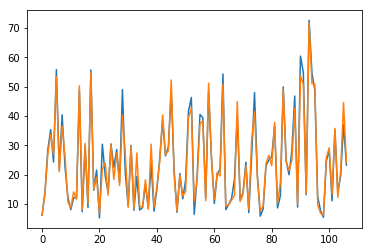

In [13]:
train=readData()
train=dropData(train)
temp=train
train=sta(train)
train_x1,train_y1,train_z1=buildTrain(train)
train_x2,train_y2,train_z2=buildTrain(temp)
train_x,train_y,train_z=train_x1,train_y2,train_z2
train_x,train_y,train_z= shuffle(train_x,train_y,train_z)
train_x,train_y, val_x, val_y ,val_z= splitData(train_x,train_y,train_z, 0.05)
model=buildModel(train_x,train_y)
predict(model,val_x,val_y,val_z)